In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [60]:
df=pd.read_excel('premiums.xlsx')
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


### Modyfying Column Names

In [61]:
df.columns=df.columns.str.replace(' ',"_").str.lower()

In [62]:
df.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


### Handling NA Values

In [63]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [64]:
df.dropna(inplace=True)

In [65]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [66]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [67]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [68]:
df[df.number_of_dependants<0].shape
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1])

In [69]:
df['number_of_dependants']=abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

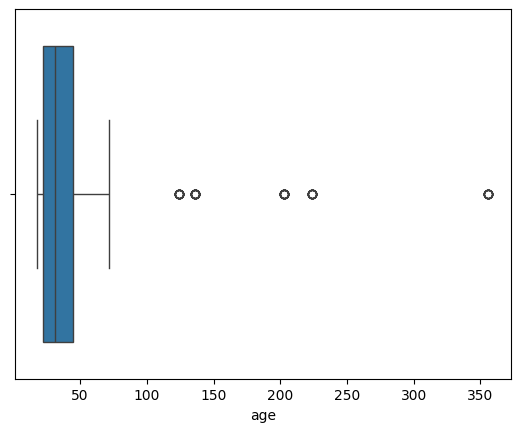

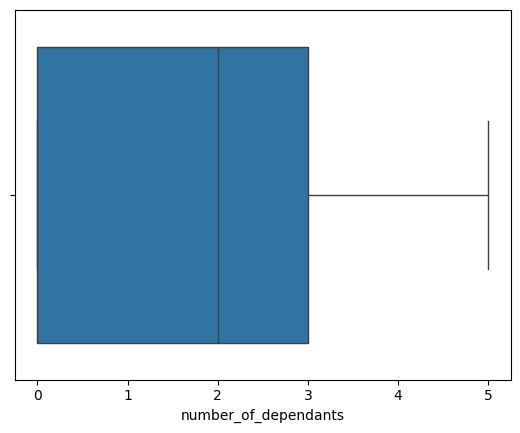

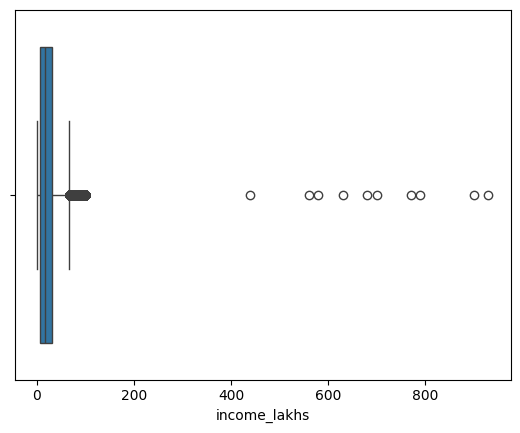

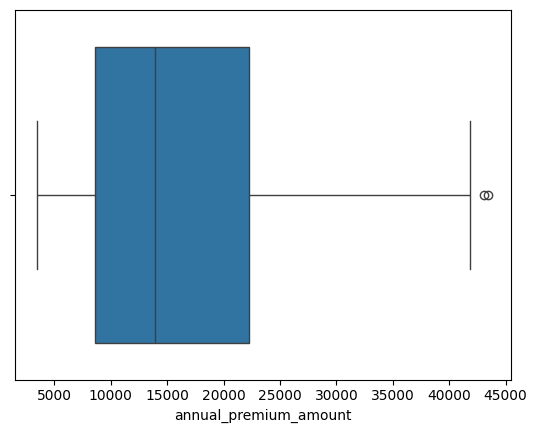

In [70]:
numerix_columns=df.select_dtypes(['float64','int64']).columns
for col in numerix_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [71]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [72]:
df1=df[df.age<100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

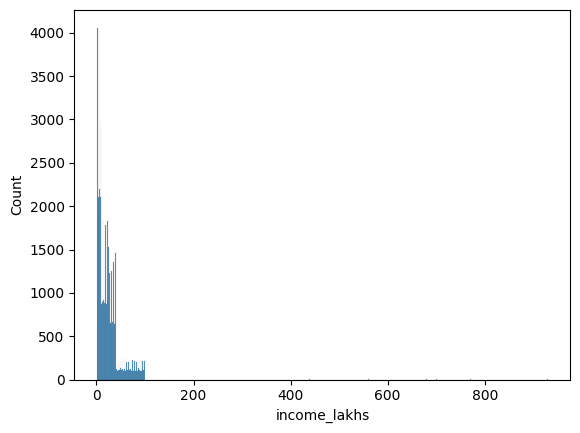

In [73]:
sns.histplot(df1.income_lakhs)

In [74]:
df1.income_lakhs.quantile([0.25,0.75])

0.25     7.0
0.75    31.0
Name: income_lakhs, dtype: float64

In [75]:
def get_iqr_bounds(col):
    Q1,Q3=df.income_lakhs.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3 + 1.5*IQR
    return lower_bound,upper_bound

In [76]:
quantile_threshold=df1.income_lakhs.quantile(0.999)
quantile_threshold

100.0

In [77]:
df2=df1[df1.income_lakhs<=quantile_threshold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


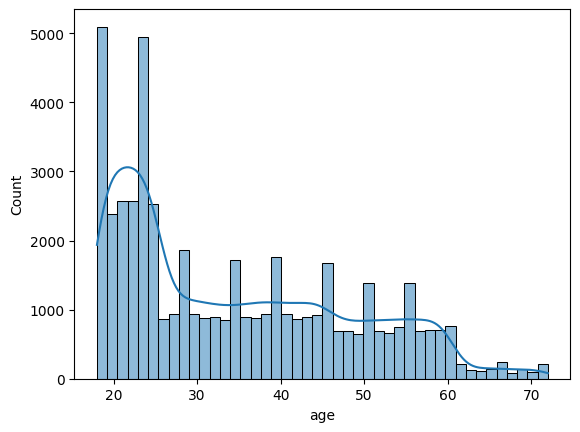

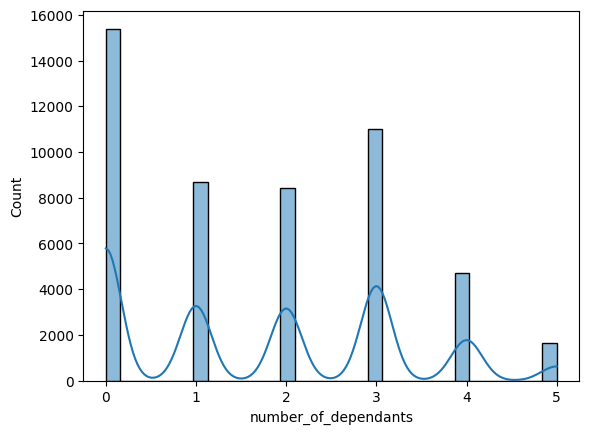

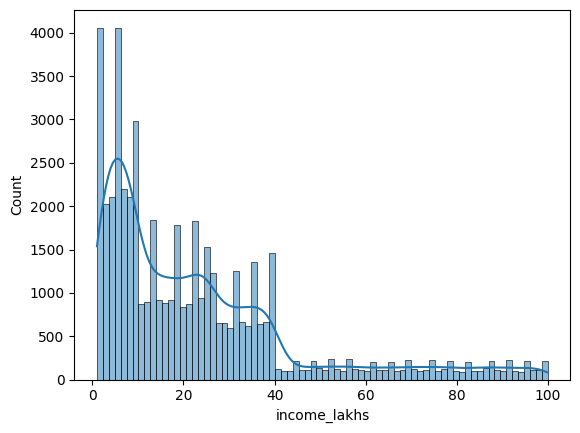

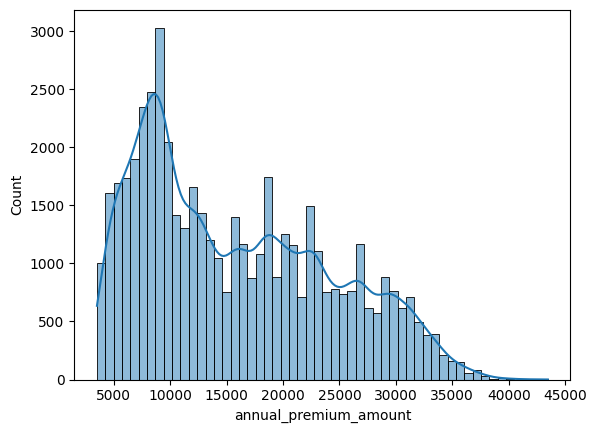

In [78]:
for col in numerix_columns:
    sns.histplot(df2[col],kde=True)
    plt.show()

In [79]:
categorical_col=df2.drop(['age','number_of_dependants','income_lakhs','annual_premium_amount'],axis='columns').columns.to_list()


In [80]:
for col in categorical_col:
    print(col,df2[col].unique())

gender ['Male' 'Female']
region ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status ['Unmarried' 'Married']
bmi_category ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status ['Salaried' 'Self-Employed' 'Freelancer']
income_level ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan ['Bronze' 'Silver' 'Gold']


In [81]:
df2.replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking',},inplace=True)

In [82]:
for col in categorical_col:
    print(col,df2[col].unique())

gender ['Male' 'Female']
region ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status ['Unmarried' 'Married']
bmi_category ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status ['No Smoking' 'Regular' 'Occasional']
employment_status ['Salaried' 'Self-Employed' 'Freelancer']
income_level ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan ['Bronze' 'Silver' 'Gold']


In [83]:
df2['gender'].value_counts(normalize=True)

gender
Male      0.549631
Female    0.450369
Name: proportion, dtype: float64

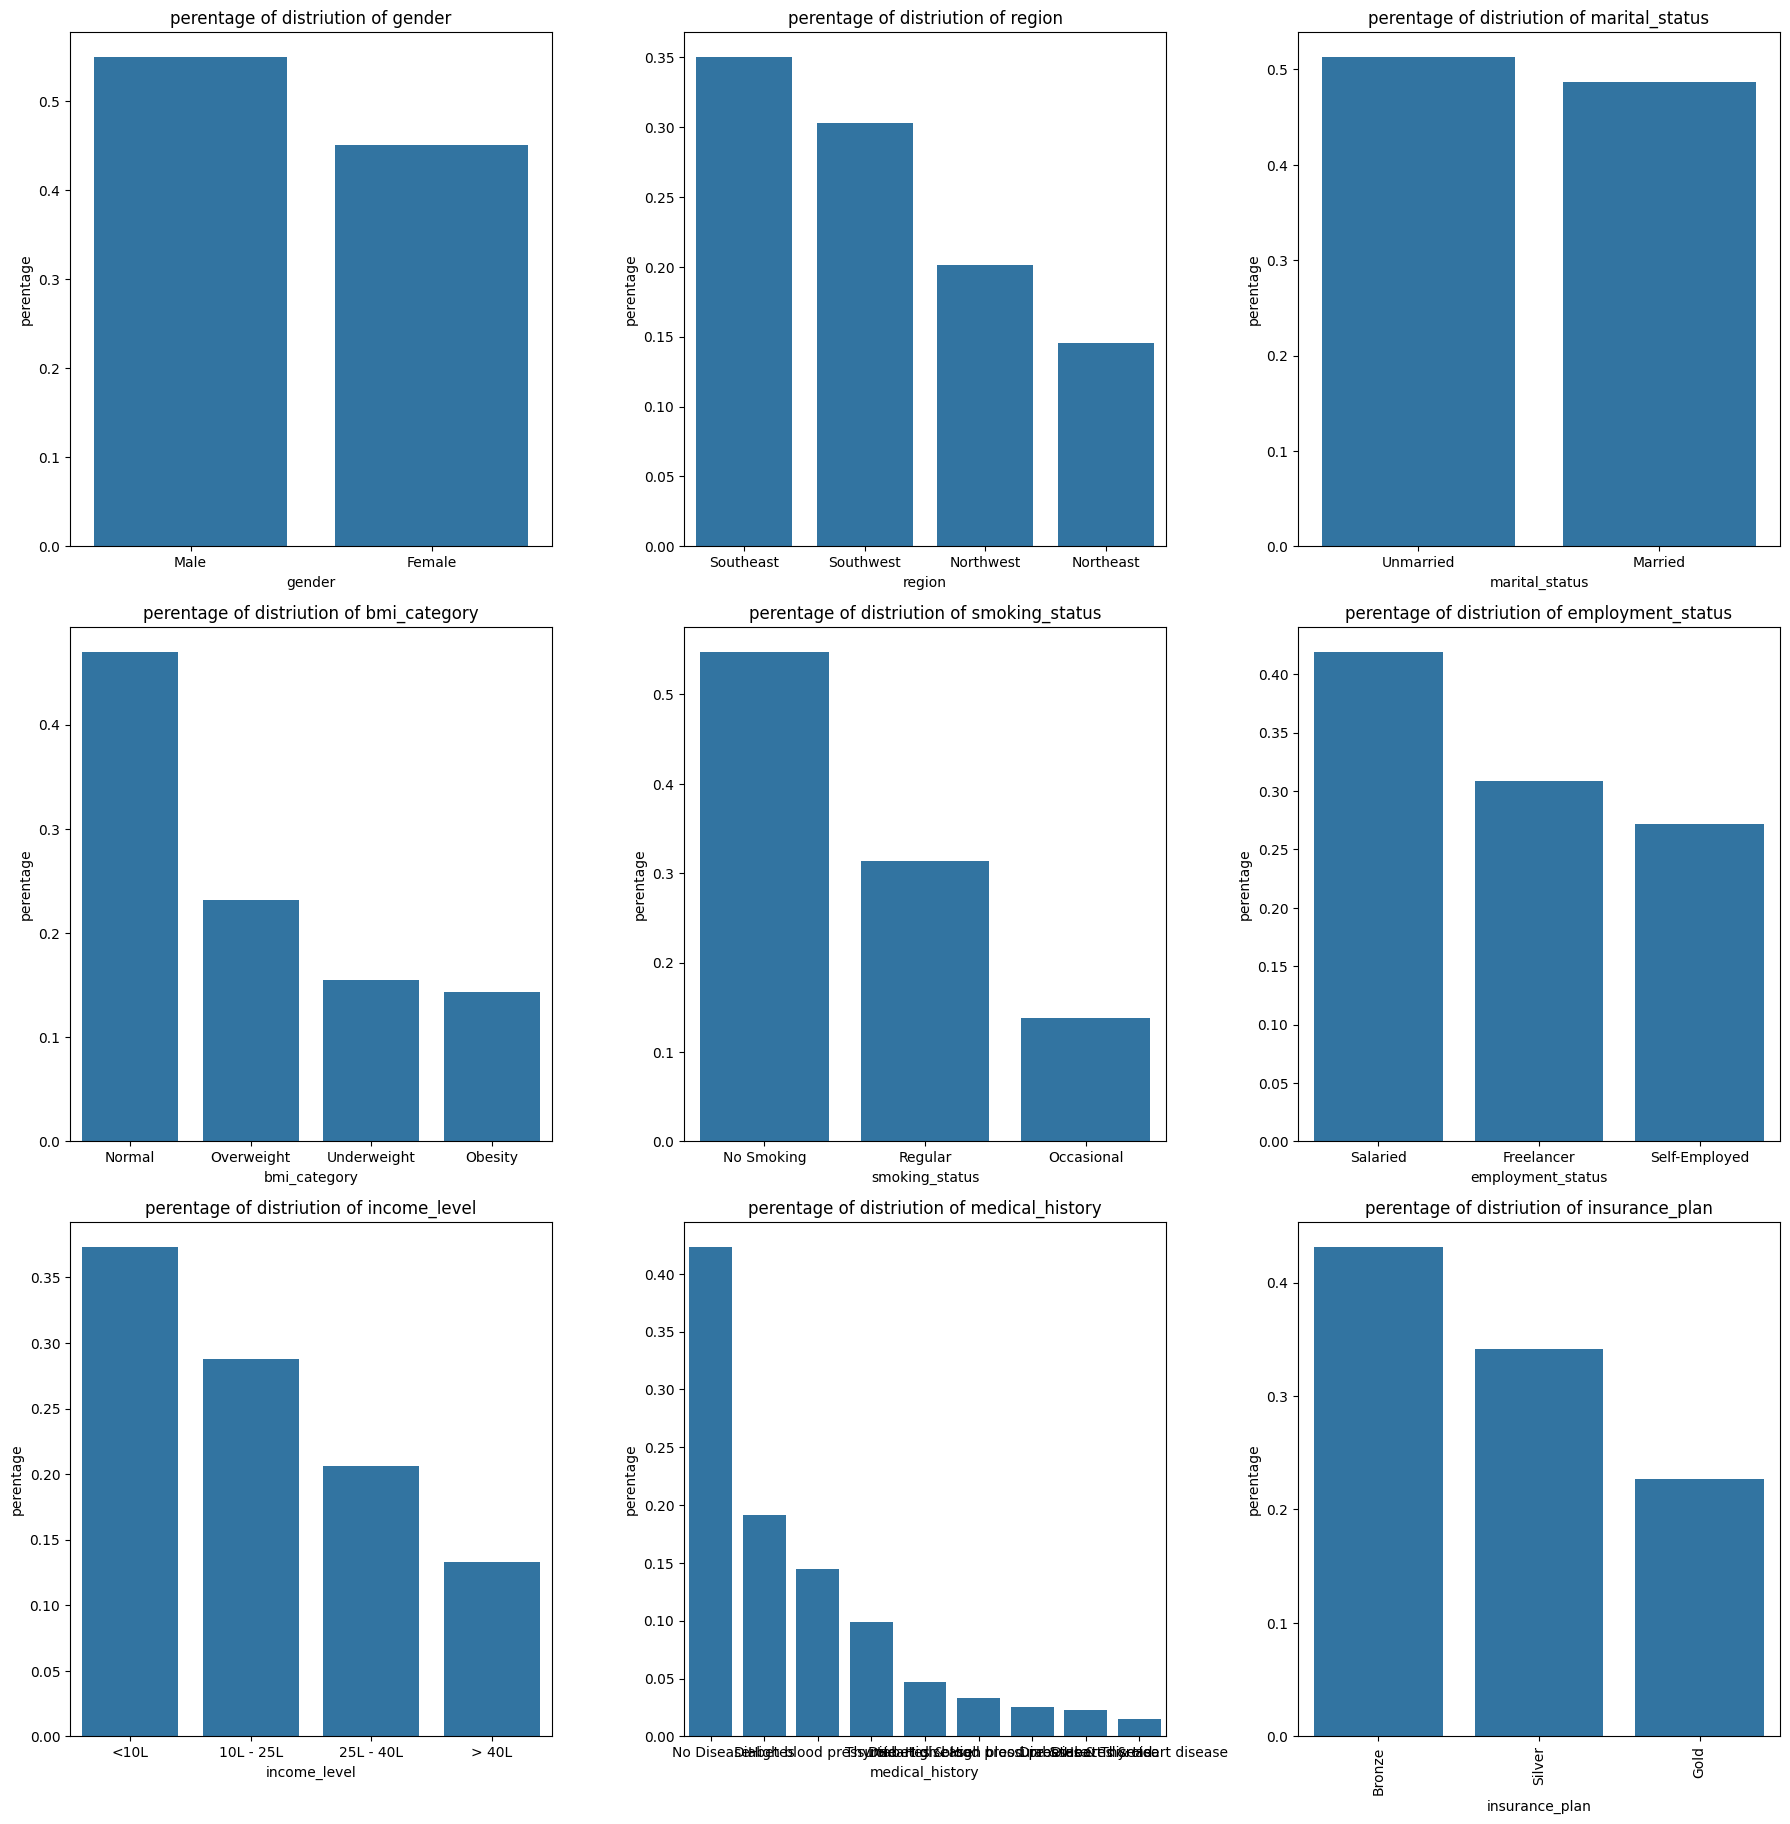

In [84]:
fig,axes=plt.subplots(3,3,figsize=(18,18))
ax=axes.flatten()
for col,ax in zip(categorical_col,ax):
    category_counts=df2[col].value_counts(normalize=True)
    sns.barplot(x=category_counts.index,y=category_counts.values,ax=ax)
    ax.set_title(f'perentage of distriution of {col}')
    
    ax.set_ylabel('perentage')
    ax.set_xlabel(col)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()
    

<Axes: xlabel='income_level'>

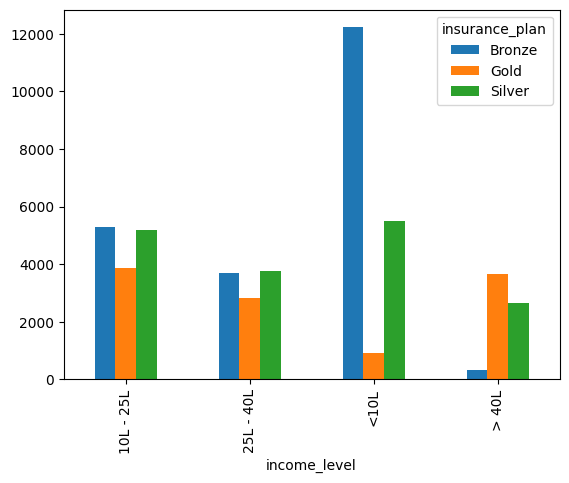

In [85]:
crosstab=pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab.plot(kind='bar')

In [86]:
df2.medical_history.unique()
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
10480,20,Male,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,47,No Disease,Silver,9013
7623,20,Male,Southeast,Unmarried,0,Overweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,4607
35720,36,Male,Southwest,Married,3,Overweight,Regular,Self-Employed,<10L,7,High blood pressure,Bronze,14277
39227,20,Female,Southwest,Unmarried,1,Normal,No Smoking,Salaried,<10L,2,No Disease,Bronze,3995
9009,40,Female,Southeast,Married,3,Normal,Occasional,Salaried,<10L,5,Diabetes,Bronze,10053


In [87]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}
df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,None
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None


In [88]:
df2.fillna({'disease1':'none'},inplace=True)
df2.fillna({'disease2':'none'},inplace=True)
# df2['disease1'].replace('diabetes ','diabetes',inplace=True)
df2['total_risk_score']=0
df2['total_risk_score'] = df2['disease1'].map(risk_scores) + df2['disease2'].map(risk_scores)
max_score=df2['total_risk_score'].max()
min_score=df2['total_risk_score'].min()
df2['normalized_score']=(df2['total_risk_score']-min_score)/(max_score-min_score)
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571


In [89]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [90]:
df2['insurance_plan']=df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})
df2.insurance_plan.unique()

array([1, 2, 3])

In [91]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,3,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,high blood pressure,none,6,0.428571


In [92]:
df2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [93]:
df2['income_level']=df2['income_level'].map({'<10L':1,'10L - 25L':2,'> 40L':4, '25L - 40L':3})
df2.income_level.unique()

array([1, 2, 4, 3])

In [94]:
nominal_columns=['gender','region','marital_status','bmi_category','smoking_status','employment_status']
df3=pd.get_dummies(df2,columns=nominal_columns,drop_first=True,dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1


In [95]:
df4=df3.drop(['medical_history','disease1','disease2','total_risk_score'],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


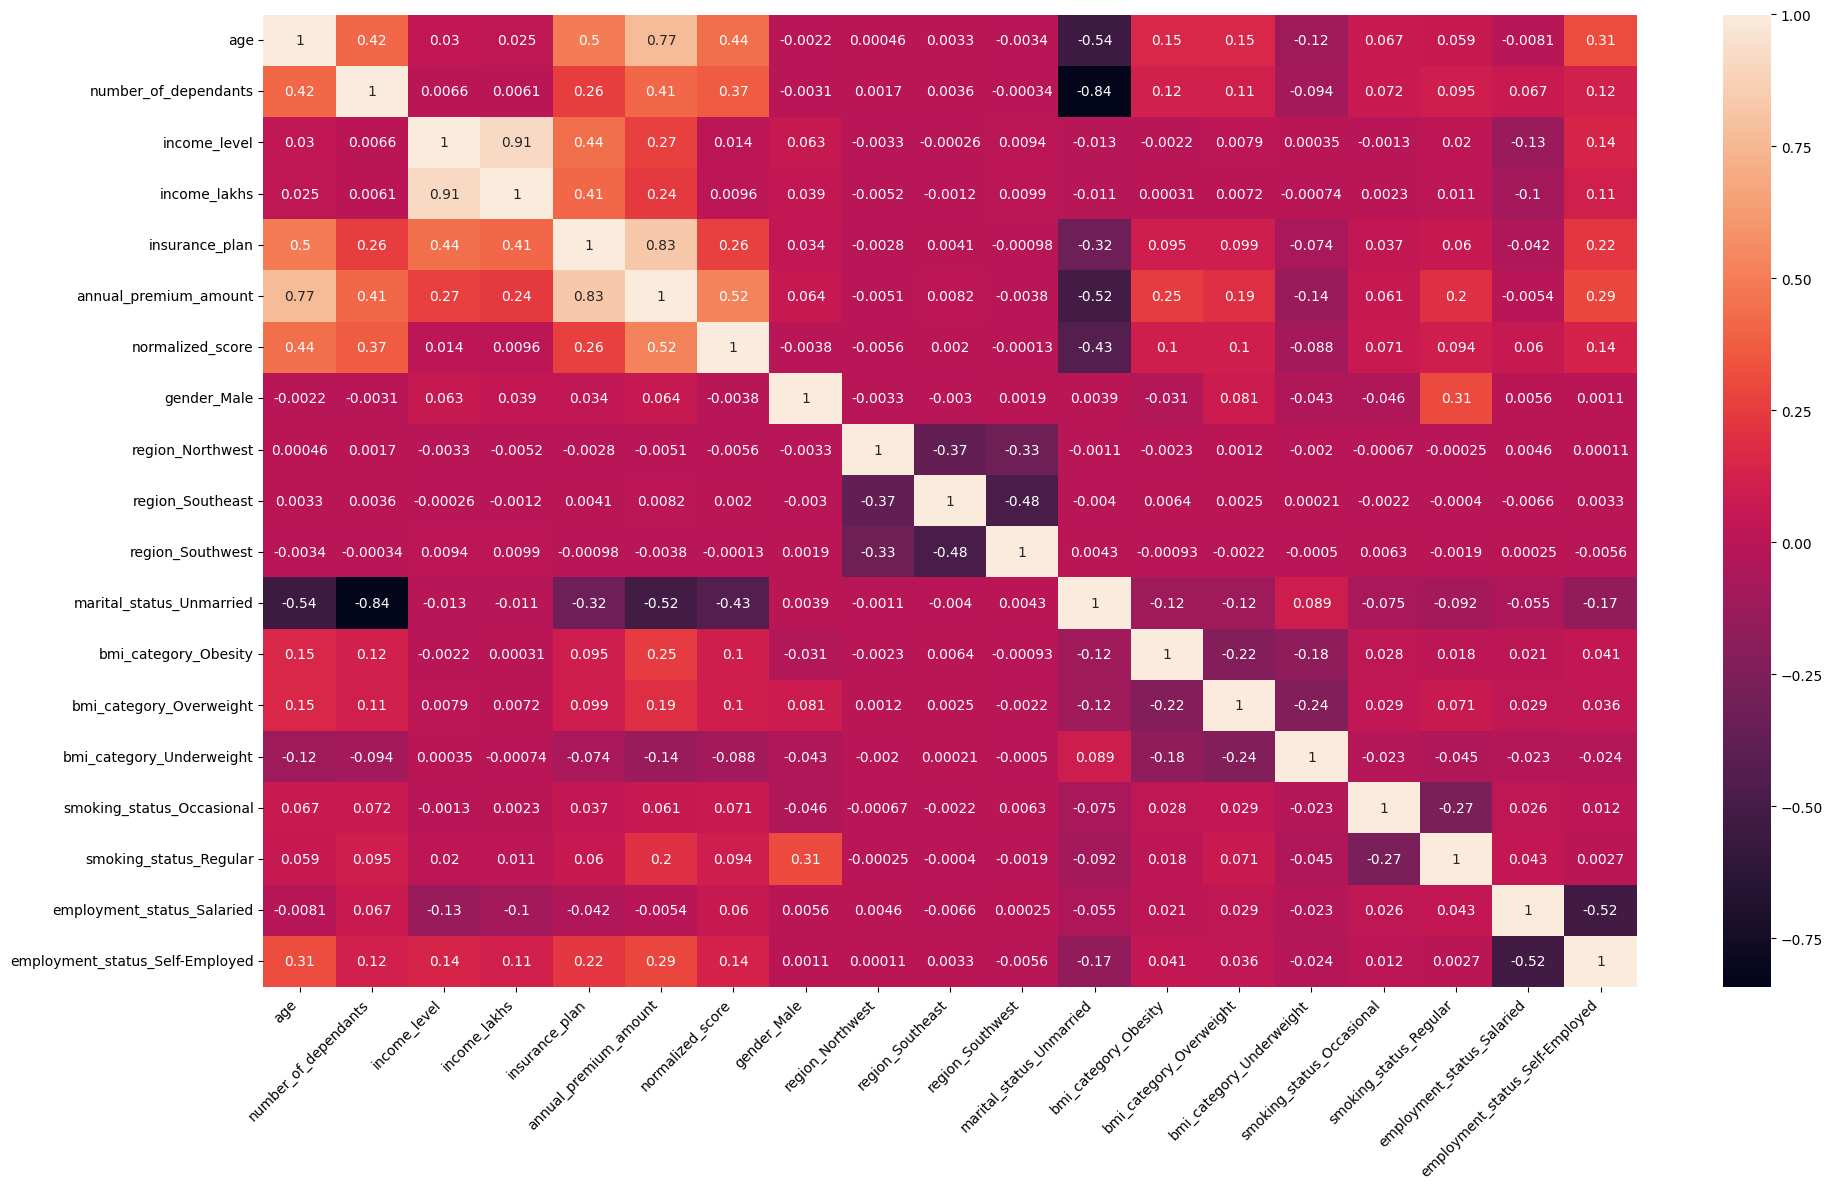

In [96]:
cm=df4.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [97]:
from sklearn.preprocessing import MinMaxScaler
X=df4.drop('annual_premium_amount',axis="columns")
y=df4['annual_premium_amount']
cols_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scaler=MinMaxScaler()
X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['Column']=data.columns
    vif_df['VIF']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

                   
calculate_vif(X)

,Column,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [99]:
X_reduecd=X.drop('income_level',axis="columns")
X_reduecd.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


#### MODEL TRAINING

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
test_score=model_lr.score(X_test,y_test)
train_score=model_lr.score(X_train,y_train)
train_score,test_score

(0.9284489203746578, 0.9284182036660735)

In [101]:
model_lr.intercept_

4783.161811034628

In [102]:
model_lr.coef_

array([11224.66419354,  -673.91286288,   897.45690897, -1712.1264765 ,
       12469.86816448,  4807.30313153,   152.19461573,   -39.49554946,
          37.59672429,   -28.25370699,  -937.05624025,  3390.3763397 ,
        1601.94375191,   388.76238083,   735.77939166,  2233.77460377,
         177.91315421,   401.5853945 ])

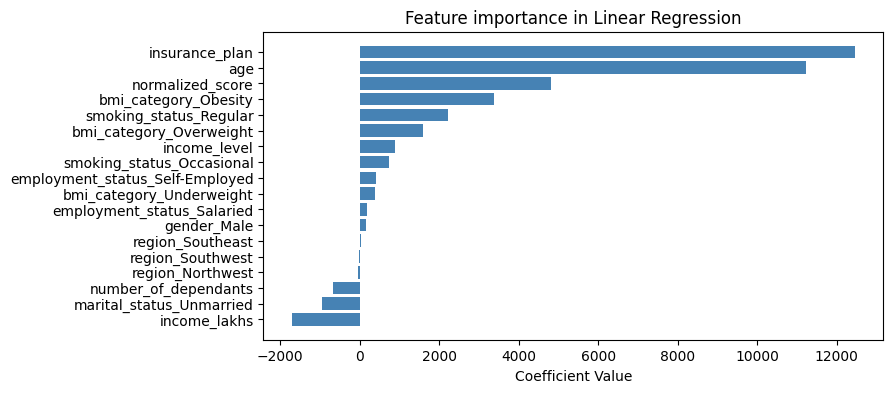

In [103]:
feature_importances=model_lr.coef_
coef_df=pd.DataFrame(feature_importances,index=X_test.columns,columns=['coefficients'])
coef_df = coef_df.sort_values(by='coefficients',ascending=True)
coef_df

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['coefficients'],color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in Linear Regression')
plt.show()

In [104]:
model_r=Ridge()
model_r.fit(X_train,y_train)
test_score=model_r.score(X_test,y_test)
train_score=model_r.score(X_train,y_train)
train_score,test_score

(0.9284488762277693, 0.9284174205841679)

In [105]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor()
model_xgb.fit(X_train,y_train)
test_score=model_xgb.score(X_test,y_test)
train_score=model_xgb.score(X_train,y_train)
train_score,test_score

(0.9861328601837158, 0.980954647064209)

In [106]:
y_pred=model_xgb.predict(X_test)
mse_xgb=mean_squared_error(y_test,y_pred)
rmse_xgb=np.sqrt(mse_xgb)
rmse_xgb

1169.3761518894796

In [107]:
param_grid={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5],
}
random_search=RandomizedSearchCV(model_xgb,param_grid,n_iter=10,cv=3,scoring='r2')
random_search.fit(X_train,y_train)
random_search.best_score_

0.9817453026771545

In [108]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.2}

In [109]:
best_model=random_search.best_estimator_

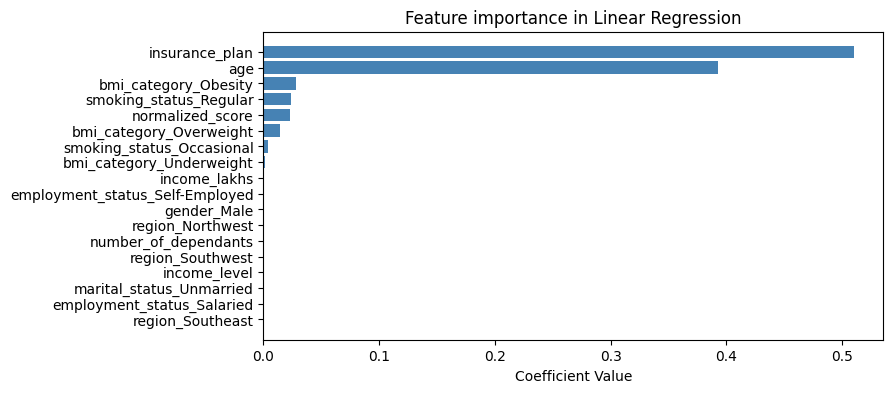

In [110]:
feature_importances=best_model.feature_importances_
coef_df=pd.DataFrame(feature_importances,index=X_test.columns,columns=['coefficients'])
coef_df = coef_df.sort_values(by='coefficients',ascending=True)
coef_df

plt.figure(figsize=(8,4))
plt.barh(coef_df.index,coef_df['coefficients'],color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature importance in Linear Regression')
plt.show()

### ERROR ANLYSIS

In [111]:
y_pred=best_model.predict(X_test)
residuals=y_pred-y_test
residuals_pct = residuals*100/y_test
results_df=pd.DataFrame({'actual':y_test,'predicted':y_pred,'diff':residuals,'diff_pct':residuals_pct})
results_df.head()

,actual,predicted,diff,diff_pct
3598,20554,20578.437500,24.437500,0.118894
35794,29647,29399.480469,-247.519531,-0.834889
43608,20560,20498.705078,-61.294922,-0.298127
42730,5018,6912.166504,1894.166504,37.747439
18936,8929,7921.579590,-1007.420410,-11.282567


<Axes: xlabel='diff_pct', ylabel='Count'>

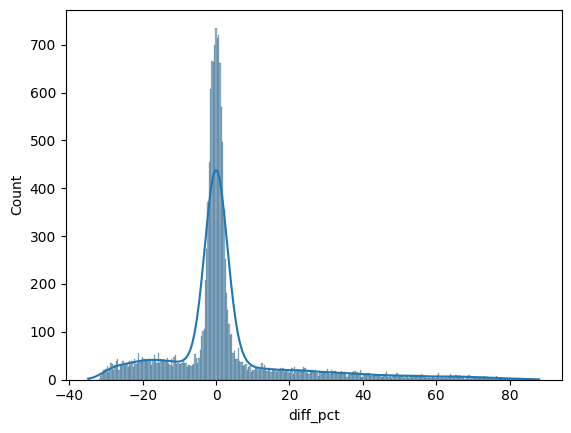

In [112]:
sns.histplot(results_df['diff_pct'],kde=True)

In [122]:
error_threshold=10
extreme_resutls_df=results_df[np.abs(results_df.diff_pct)>error_threshold]
extreme_resutls_df

,actual,predicted,diff,diff_pct
42730,5018,6912.166504,1894.166504,37.747439
18936,8929,7921.579590,-1007.420410,-11.282567
20029,5140,6593.971191,1453.971191,28.287377
4294,9631,7226.381836,-2404.618164,-24.967482
44419,4687,6705.285645,2018.285645,43.061354
...,...,...,...,...
8767,8113,6520.940430,-1592.059570,-19.623562
25179,9944,7055.726562,-2888.273438,-29.045389
21592,8332,10741.868164,2409.868164,28.923046
49274,5571,6728.159668,1157.159668,20.771130


In [117]:
extreme_error_pct=extreme_resutls_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

29.43965805115875

In [120]:
extreme_resutls_df=results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct',ascending=False)
extreme_resutls_df

,actual,predicted,diff,diff_pct
36269,3501,6582.894531,3081.894531,88.028978
42342,3521,6543.721191,3022.721191,85.848372
48801,3516,6521.128418,3005.128418,85.470092
16079,3539,6561.387207,3022.387207,85.402295
898,3602,6672.636719,3070.636719,85.248104
...,...,...,...,...
43855,4526,6797.239258,2271.239258,50.182043
22445,4887,7336.899414,2449.899414,50.130948
48531,4344,6520.731934,2176.731934,50.108930
12898,4428,6645.240234,2217.240234,50.073176


In [125]:
extreme_error_df=X_test.loc[extreme_resutls_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
42730,0.092593,0.2,0.333333,0.131313,0.0,0.428571,1,0,0,0,1,0,1,0,0,0,0,0
18936,0.074074,0.0,0.333333,0.202020,0.0,0.428571,1,0,0,1,1,0,1,0,0,1,0,1
20029,0.018519,0.2,0.000000,0.030303,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,1,0
4294,0.000000,0.2,0.000000,0.020202,0.0,0.000000,1,0,0,1,1,0,1,0,0,0,0,0
44419,0.055556,0.0,0.333333,0.242424,0.0,0.000000,0,0,0,0,1,0,0,1,0,0,0,0


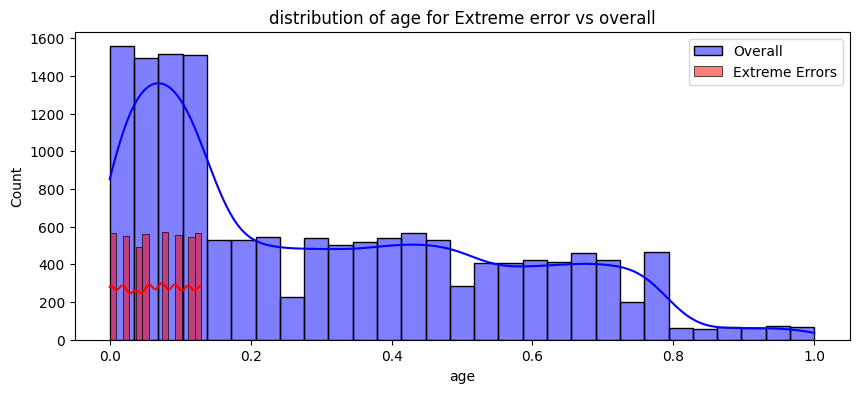

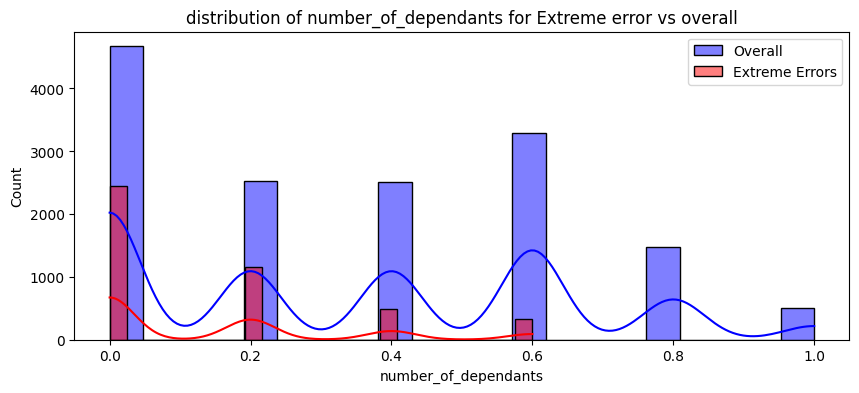

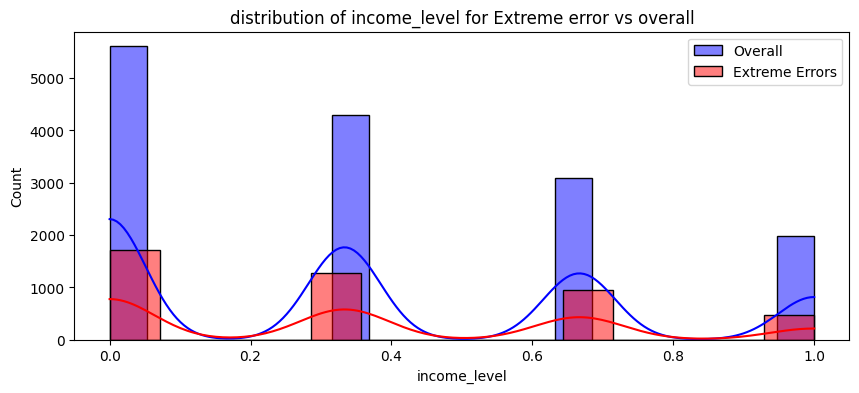

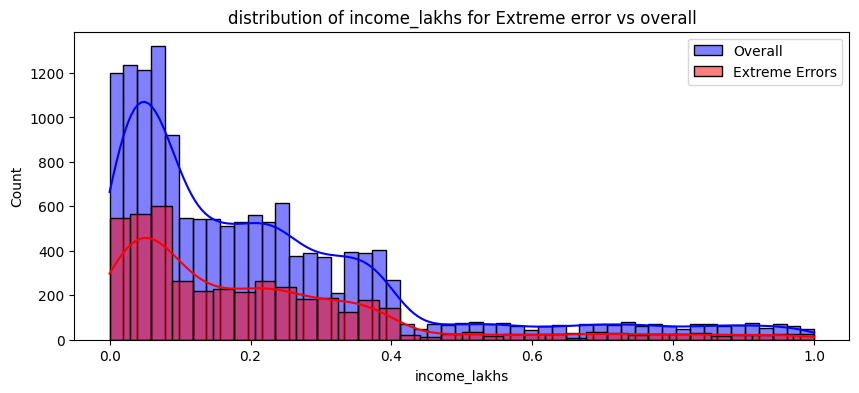

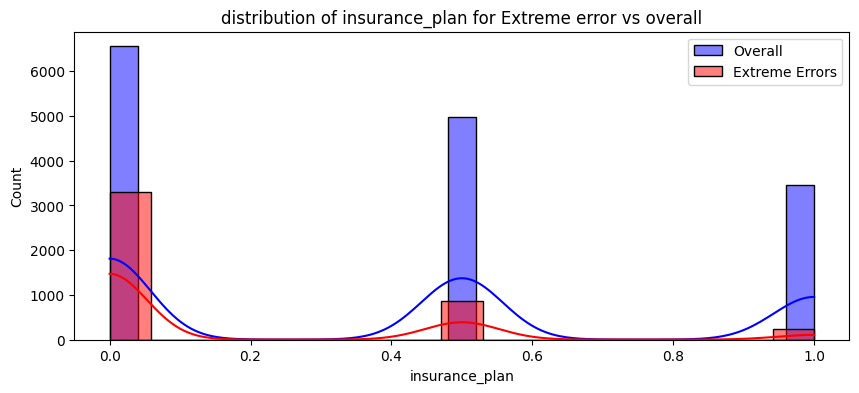

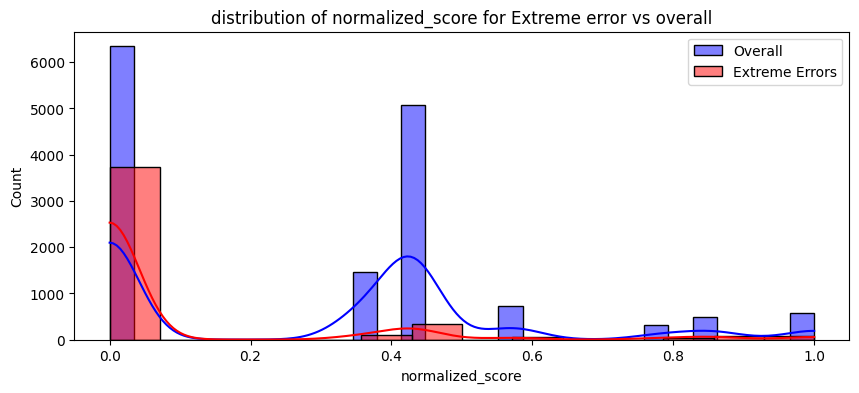

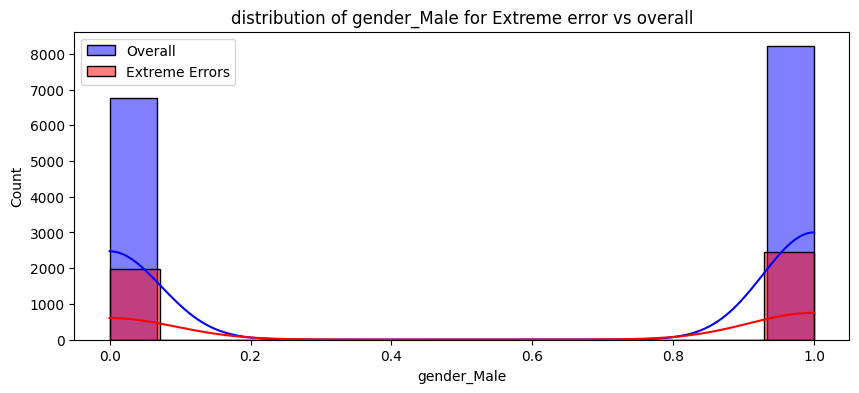

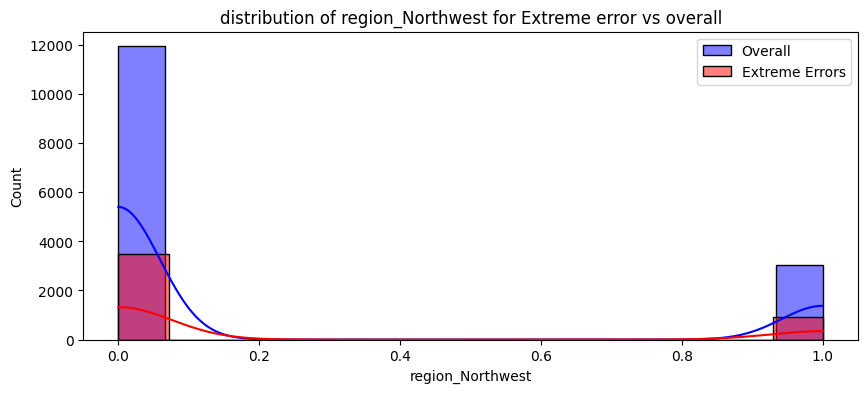

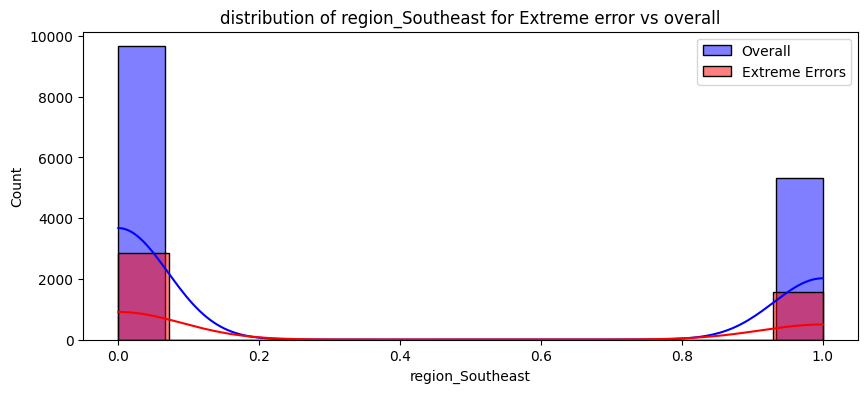

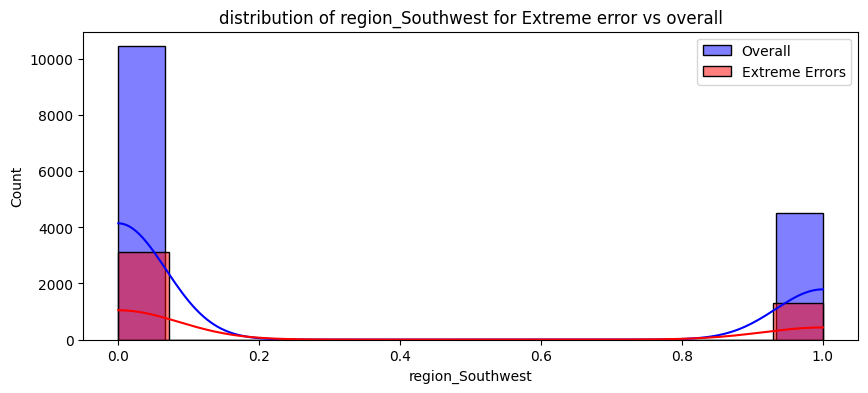

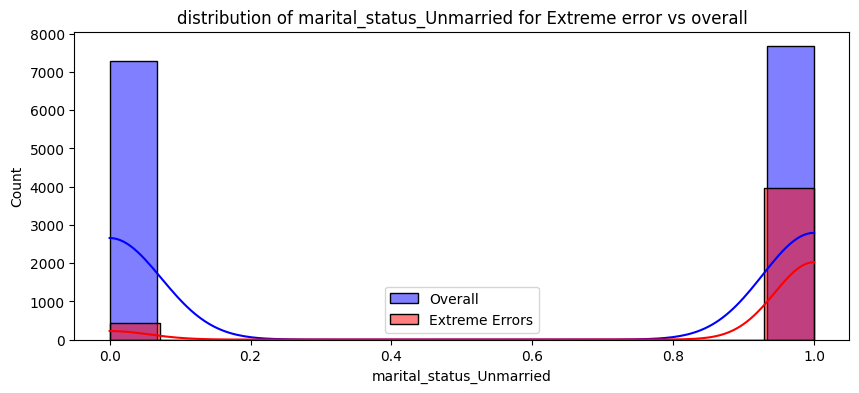

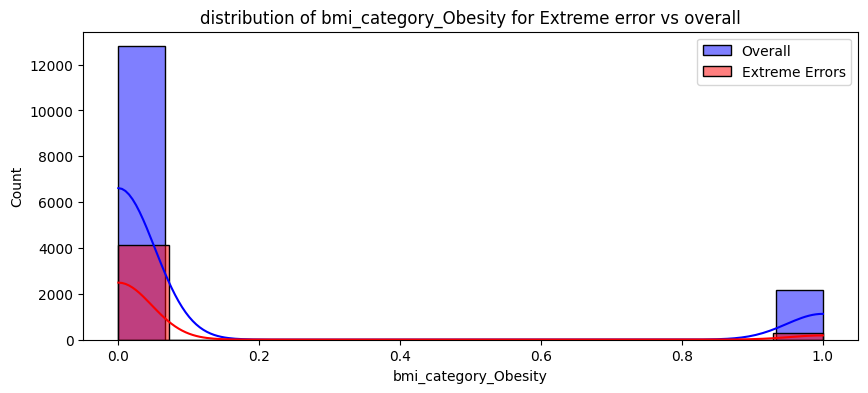

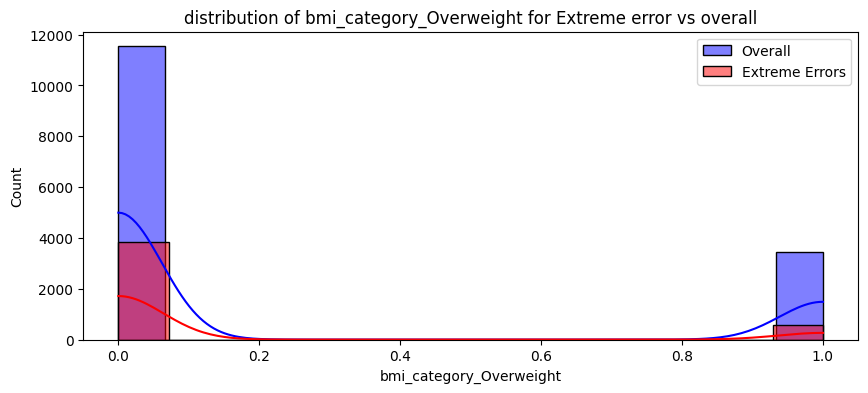

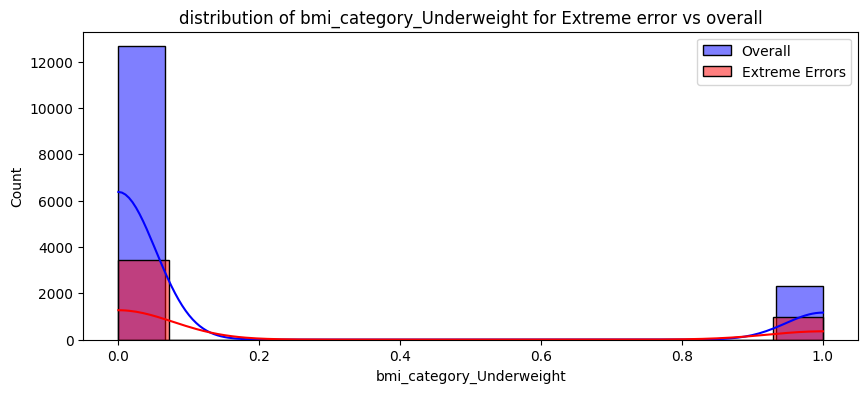

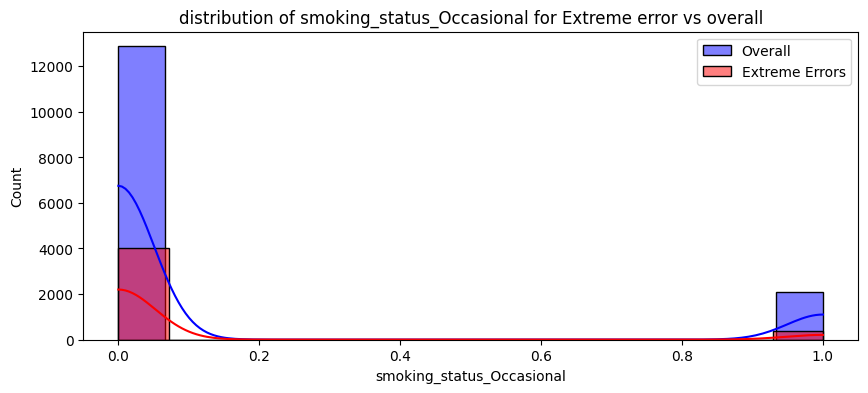

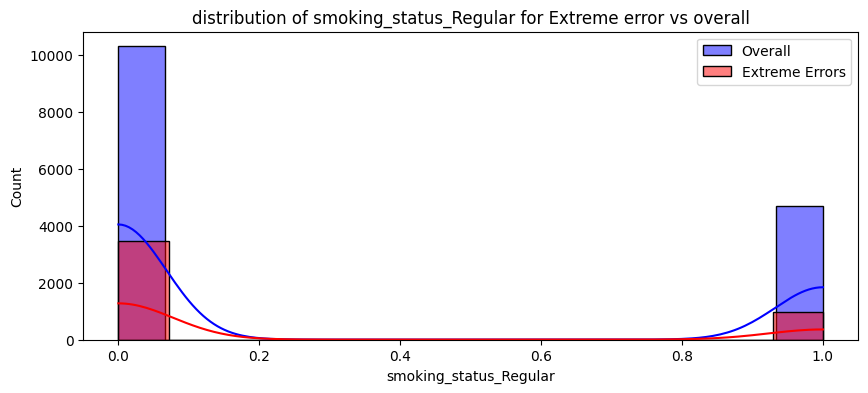

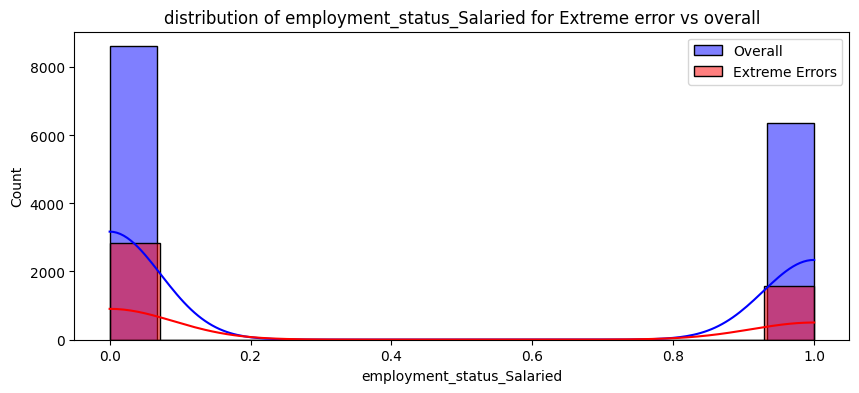

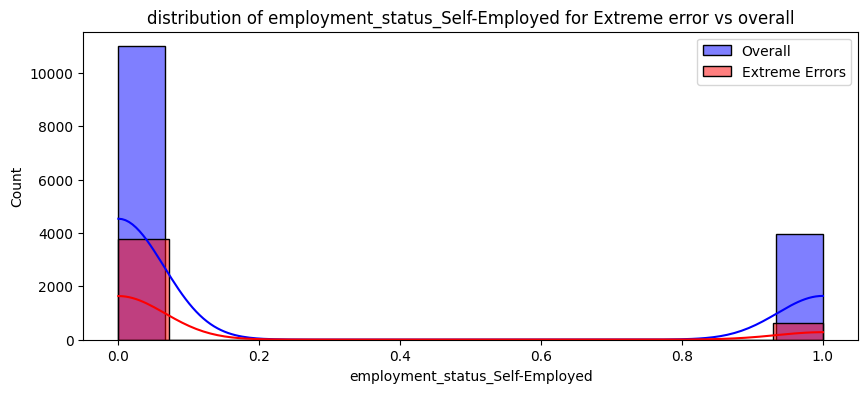

In [133]:
for feature in X_test.columns:
        plt.figure(figsize=(10,4))
        
        sns.histplot(X_test[feature],label="Overall",color='blue',alpha=0.5,kde=True)
        sns.histplot(extreme_error_df[feature],label="Extreme Errors",color='red',kde=True)
        plt.title(f'distribution of {feature} for Extreme error vs overall')
        plt.legend()
        plt.show()

In [135]:
extreme_error_df.columns,cols_to_scale

(Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
        'insurance_plan', 'normalized_score', 'gender_Male', 'region_Northwest',
        'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
        'bmi_category_Obesity', 'bmi_category_Overweight',
        'bmi_category_Underweight', 'smoking_status_Occasional',
        'smoking_status_Regular', 'employment_status_Salaried',
        'employment_status_Self-Employed'],
       dtype='object'),
 ['age',
  'number_of_dependants',
  'income_level',
  'income_lakhs',
  'insurance_plan'])

In [136]:
extreme_error_df['income_level']=-1
df_reversed=pd.DataFrame()
df_reversed[cols_to_scale]=scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,23.0,1.0,-2.0,14.0,1.0
1,22.0,0.0,-2.0,21.0,1.0
2,19.0,1.0,-2.0,4.0,1.0
3,18.0,1.0,-2.0,3.0,1.0
4,21.0,0.0,-2.0,25.0,1.0
...,...,...,...,...,...
4403,19.0,1.0,-2.0,8.0,1.0
4404,25.0,0.0,-2.0,12.0,1.0
4405,21.0,0.0,-2.0,7.0,2.0
4406,21.0,1.0,-2.0,8.0,1.0


<Axes: xlabel='age', ylabel='Count'>

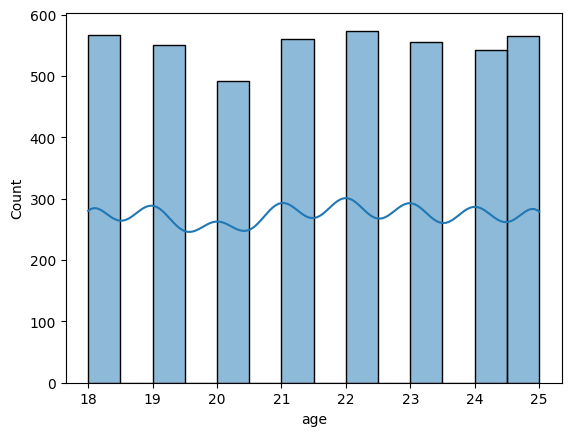

In [137]:
sns.histplot(df_reversed.age,kde=True)

In [139]:
df_reversed.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,4408.000000,4408.000000,4408.0,4408.000000,4408.000000
mean,21.517241,0.704174,-2.0,21.519056,1.304673
std,2.301561,0.932270,0.0,20.807744,0.565201
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,19.000000,0.000000,-2.0,6.000000,1.000000
50%,22.000000,0.000000,-2.0,16.000000,1.000000
75%,24.000000,1.000000,-2.0,30.000000,2.000000
max,25.000000,3.000000,-2.0,100.000000,3.000000
